# Steven Project
# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import sys
import time
import datetime
import csv
import glob

# This function use to mark down when the code is starting to run
def timestamp():
    print("Start Time:", datetime.datetime.now().time().strftime("%H:%M:%S"))
    
timestamp()
print("Process is done!")



Start Time: 20:55:14
Process is done!


---
## Step 0: Load The Data

In [2]:
timestamp()
# Load pickled data
import pickle
import numpy as np
import cv2
from pandas.io.parsers import read_csv
from matplotlib import pyplot


signnames = read_csv("signnames.csv").values[:, 1]
# TODO: Fill this in based on where you saved the training and testing data
begin_time = time.time()
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

print ("Done loading data...")

Start Time: 20:55:14
Done loading data...


---

## Step 1: Dataset Summary & exploratory visualization on the dataset

The pickled data is a dictionary contains the following key/values:

- `'features'` is the properties of information of the traffic sign images: such as number, width, height, and channels.
- `'labels'` is the id (classes number) of traffic sign. This id is map with the id and description in "signnames.csv" file.
- `'sizes'` is the original width and height the image.
- `'coords'` is coordinates of a bounding box around the sign in the image.

Below is the summary of dataset:

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
timestamp()
# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.

n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Start Time: 20:55:14
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Start Time: 20:55:14
Class 0: Speed limit (20km/h)                                180 samples


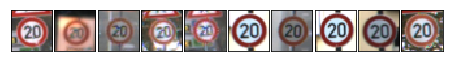

----------------------------------------------------

Class 1: Speed limit (30km/h)                                1980 samples


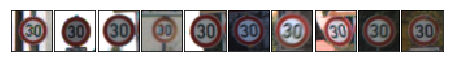

----------------------------------------------------

Class 2: Speed limit (50km/h)                                2010 samples


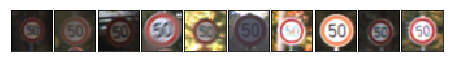

----------------------------------------------------

Class 3: Speed limit (60km/h)                                1260 samples


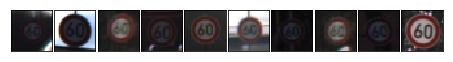

----------------------------------------------------

Class 4: Speed limit (70km/h)                                1770 samples


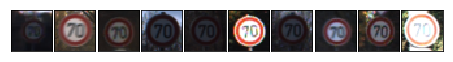

----------------------------------------------------

Class 5: Speed limit (80km/h)                                1650 samples


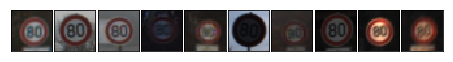

----------------------------------------------------

Class 6: End of speed limit (80km/h)                         360 samples


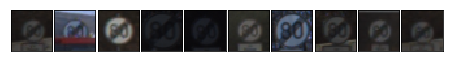

----------------------------------------------------

Class 7: Speed limit (100km/h)                               1290 samples


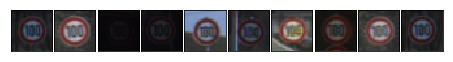

----------------------------------------------------

Class 8: Speed limit (120km/h)                               1260 samples


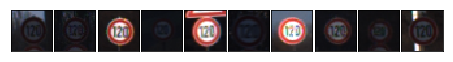

----------------------------------------------------

Class 9: No passing                                          1320 samples


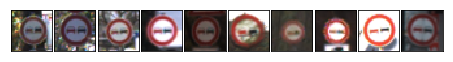

----------------------------------------------------

Class 10: No passing for vehicles over 3.5 metric tons        1800 samples


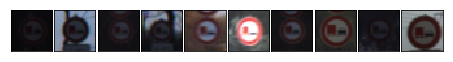

----------------------------------------------------

Class 11: Right-of-way at the next intersection               1170 samples


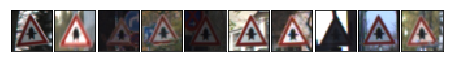

----------------------------------------------------

Class 12: Priority road                                       1890 samples


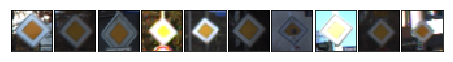

----------------------------------------------------

Class 13: Yield                                               1920 samples


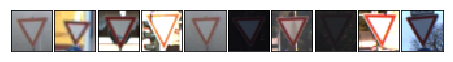

----------------------------------------------------

Class 14: Stop                                                690 samples


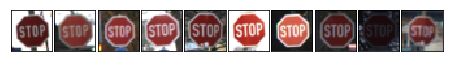

----------------------------------------------------

Class 15: No vehicles                                         540 samples


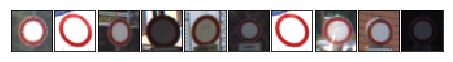

----------------------------------------------------

Class 16: Vehicles over 3.5 metric tons prohibited            360 samples


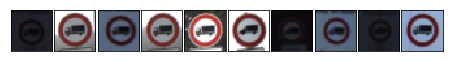

----------------------------------------------------

Class 17: No entry                                            990 samples


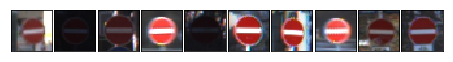

----------------------------------------------------

Class 18: General caution                                     1080 samples


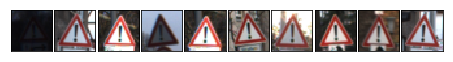

----------------------------------------------------

Class 19: Dangerous curve to the left                         180 samples


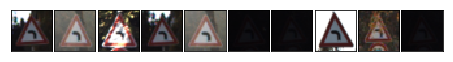

----------------------------------------------------

Class 20: Dangerous curve to the right                        300 samples


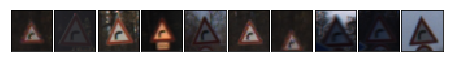

----------------------------------------------------

Class 21: Double curve                                        270 samples


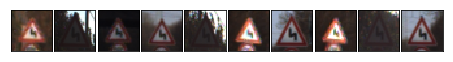

----------------------------------------------------

Class 22: Bumpy road                                          330 samples


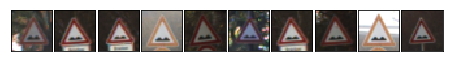

----------------------------------------------------

Class 23: Slippery road                                       450 samples


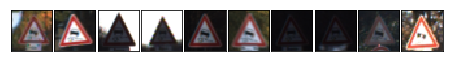

----------------------------------------------------

Class 24: Road narrows on the right                           240 samples


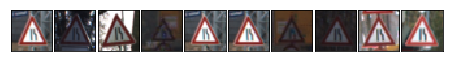

----------------------------------------------------

Class 25: Road work                                           1350 samples


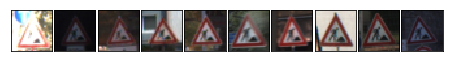

----------------------------------------------------

Class 26: Traffic signals                                     540 samples


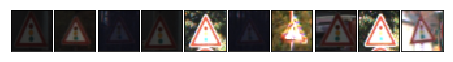

----------------------------------------------------

Class 27: Pedestrians                                         210 samples


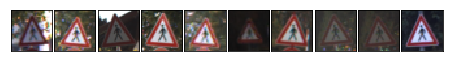

----------------------------------------------------

Class 28: Children crossing                                   480 samples


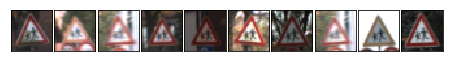

----------------------------------------------------

Class 29: Bicycles crossing                                   240 samples


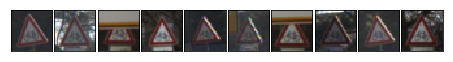

----------------------------------------------------

Class 30: Beware of ice/snow                                  390 samples


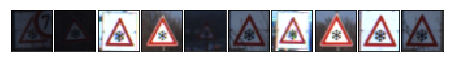

----------------------------------------------------

Class 31: Wild animals crossing                               690 samples


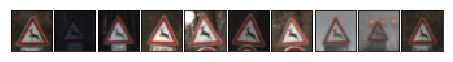

----------------------------------------------------

Class 32: End of all speed and passing limits                 210 samples


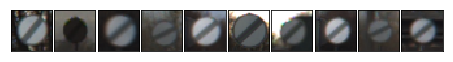

----------------------------------------------------

Class 33: Turn right ahead                                    599 samples


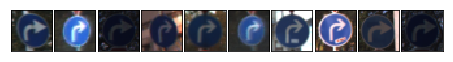

----------------------------------------------------

Class 34: Turn left ahead                                     360 samples


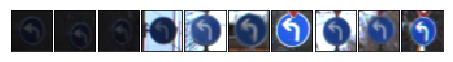

----------------------------------------------------

Class 35: Ahead only                                          1080 samples


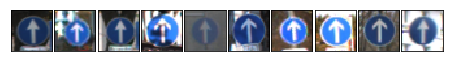

----------------------------------------------------

Class 36: Go straight or right                                330 samples


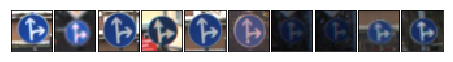

----------------------------------------------------

Class 37: Go straight or left                                 180 samples


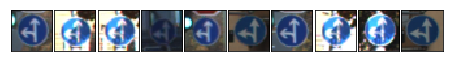

----------------------------------------------------

Class 38: Keep right                                          1860 samples


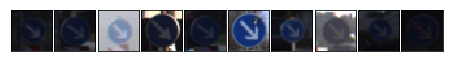

----------------------------------------------------

Class 39: Keep left                                           270 samples


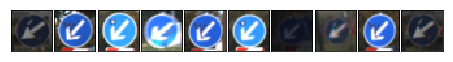

----------------------------------------------------

Class 40: Roundabout mandatory                                300 samples


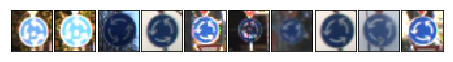

----------------------------------------------------

Class 41: End of no passing                                   210 samples


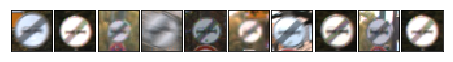

----------------------------------------------------

Class 42: End of no passing by vehicles over 3.5 metric tons  210 samples


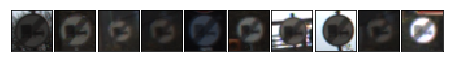

----------------------------------------------------



In [4]:
timestamp()
import random
import matplotlib.pyplot as plt
%matplotlib inline

col_width = max(len(name) for name in signnames)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s  %s samples" % (c, col_width, signnames[c], str(c_count)))
    fig = pyplot.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    pyplot.show()
    print("----------------------------------------------------\n")
    


The dataset consists of 43 classes of images. Above graph display each classe with 10 of its images and the total images in each class

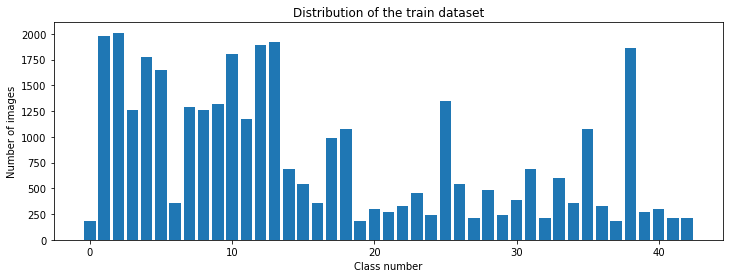

Min number of images per class = 180
Max number of images per class = 2010


In [5]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), class_counts)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

print("Min number of images per class =", min(class_counts))
print("Max number of images per class =", max(class_counts))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

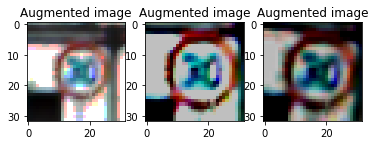

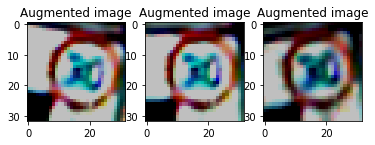

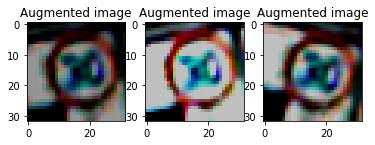

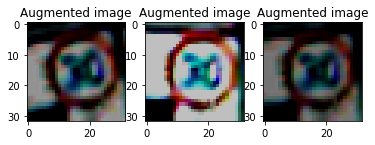

Original image size is (32, 32, 3)
Final image size is (32, 32, 3)


In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


img_size=X_train.shape[1]

def showimg(img, img1, img2):
    plt.figure(figsize=(6, 2))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Augmented image")
    plt.subplot(1, 3, 2)
    plt.imshow(img1)
    plt.title("Augmented image")
    plt.subplot(1, 3, 3)
    plt.imshow(img2)
    plt.title("Augmented image")
    plt.show()
#Histogram Equalization   
def eq_Hist(img):
    img[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    img[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    img[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    return img

def scale_img(img):
    img2=img.copy()
    sc_y=0.4*np.random.rand()+1.0
    img2=cv2.resize(img, (32,32), interpolation = cv2.INTER_CUBIC)
    #c_x,c_y, sh = int(img2.shape[0]), int(img2.shape[1]), int(img_size)
    return img2

def crop(img, mar=0):
    c_x,c_y, sh = int(img.shape[0]/2), int(img.shape[1]/2), int(img_size/2-mar)
    return img[(c_x-sh):(c_x+sh),(c_y-sh):(c_y+sh)]

#random subsample image
def crop_rand(img, mar=0):
    shift = (1-1)*2+1
    a = int(np.random.randint(shift)-shift/2)
    b = int(np.random.randint(shift)-shift/2)
    c_x,c_y, sh = int(img.shape[0]/2), int(img.shape[1]/2), int(img_size/2-mar)
    return img[(c_x-sh+a):(c_x+sh+a),(c_y-sh+b):(c_y+sh+b)]

def rotate_img(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

#Compute linear image transformation ing*s+m
def lin_img(img, s=1.0, m=0.0):
    img2=cv2.multiply(img, np.array([s]))
    return cv2.add(img2, np.array([m]))

#Apply random brightness on an image
def bright_img(img):
    img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    br = 0.3+np.random.uniform()
    if br > 1.0:
        br = 1.0
    img[:,:,2] = img[:,:,2]*br
    img = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    return img
#Change image contrast; s>1 - increase
def contr_img(img, s=1.0):
    m=127.0*(1.0-s)
    return lin_img(img, s, m)

def transform_img(img, rand=False):
    img2 = eq_Hist(img)
    img2=sharpen_img(img2)
    if rand:
        img2 = crop_rand(img2,4)
        img2 = bright_img(img2)
        img2 = scale_img(img2)
    else:
        img2 = crop(img2,4)
        img2 = scale_img(img2)
        #img2 = eq_Hist(img2)
    img2=contr_img(img2, 1.5)
    return img2

def augment_img(img, rand=True):
    img=contr_img(img, 0.9*np.random.rand()+0.1)
    img=rotate_img(img)
    img=scale_img(img)
    return transform_img(img, rand)

x_selected = X_train[y_train == 1]
im=x_selected[60, :, :, :]
imp=contr_img(im, 0.5)

showimg(im, transform_img(im), augment_img(im))
showimg(augment_img(im), augment_img(im), augment_img(im))
showimg(augment_img(im), augment_img(im), augment_img(im))
showimg(augment_img(im), augment_img(im), augment_img(im))
print("Original image size is", im.shape)
print("Final image size is", augment_img(im).shape)

In [7]:
timestamp()


input_indices = []
output_indices = []

for i in range(n_classes):
    print (i, ': ' , end='')
    class_indices = np.where(y_train == i)
    n_samples = len ( class_indices[0])
    if n_samples < 500:
        for j in range ( 500 - n_samples):
            input_indices.append(class_indices[0][j % n_samples])
            output_indices.append(X_train.shape[0])
            
            x_selected = X_train[class_indices[0]]
            im=x_selected[j % n_samples, :, :, :]
           
            #new_img = X_train_normalized[class_indices[0][j % n_samples]]
            new_img = augment_img(im)
           
            X_train = np.concatenate((X_train, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [i]), axis=0)
            if j % 50 == 0:
                print('>', end='')
            elif j % 10 == 0:
                print('-',end='')
    print('')
            
print('X, y shapes:', X_train.shape, y_train.shape)


Start Time: 20:55:35
0 : >---->---->---->---->---->---->-
1 : 
2 : 
3 : 
4 : 
5 : 
6 : >---->---->---
7 : 
8 : 
9 : 
10 : 
11 : 
12 : 
13 : 
14 : 
15 : 
16 : >---->---->---
17 : 
18 : 
19 : >---->---->---->---->---->---->-
20 : >---->---->---->----
21 : >---->---->---->---->--
22 : >---->---->---->-
23 : >----
24 : >---->---->---->---->---->
25 : 
26 : 
27 : >---->---->---->---->---->---
28 : >-
29 : >---->---->---->---->---->
30 : >---->---->
31 : 
32 : >---->---->---->---->---->---
33 : 
34 : >---->---->---
35 : 
36 : >---->---->---->-
37 : >---->---->---->---->---->---->-
38 : 
39 : >---->---->---->---->--
40 : >---->---->---->----
41 : >---->---->---->---->---->---
42 : >---->---->---->---->---->---
X, y shapes: (39239, 32, 32, 3) (39239,)


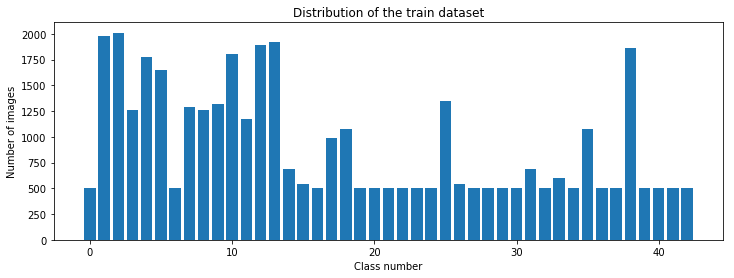

Min number of images per class = 500
Max number of images per class = 2010


In [8]:
hist, bins = np.histogram(y_train, bins= n_classes)
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), hist)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

print("Min number of images per class =", min(hist))
print("Max number of images per class =", max(hist))

Original Shape:  (39239, 32, 32, 3)
Normalized Shape:  (39239, 32, 32, 1)


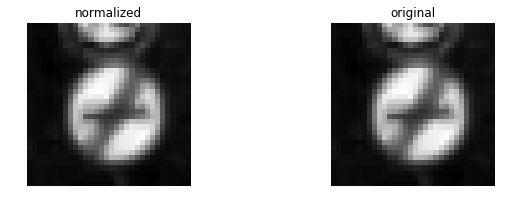

In [9]:

X_train_rgb = X_train
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)

X_test_rgb = X_test
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

X_train_normalized = (X_train_gray -128) /128
x_test_normalized = (X_test_gray -128) /128

print ("Original Shape: ", X_train.shape)
print ("Normalized Shape: ", X_train_normalized.shape)


fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_train_normalized[0].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train_gray[0].squeeze(), cmap='gray')



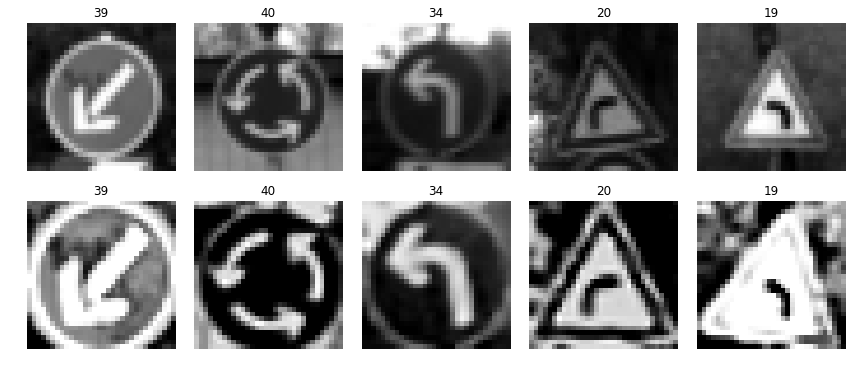

In [10]:
# show comparisons of 5 random augmented data points
choices = list(range(len(input_indices)))
picks = []
for i in range(5):
    rnd_index = np.random.randint(low=0,high=len(choices))
    picks.append(choices.pop(rnd_index))
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(5):
    image = X_train_normalized[input_indices[picks[i]]].squeeze()
    axs[i].axis('off')
    axs[i].imshow(image, cmap = 'gray')
    axs[i].set_title(y_train[input_indices[picks[i]]])
for i in range(5):
    image = X_train_normalized[output_indices[picks[i]]].squeeze()
    axs[i+5].axis('off')
    axs[i+5].imshow(image, cmap = 'gray')
    axs[i+5].set_title(y_train[output_indices[picks[i]]])

In [11]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train_normalized, y_train = shuffle(X_train_normalized, y_train)

X_train, X_validation, y_train, y_validation = train_test_split(X_train_normalized, y_train, 
                                                                test_size=0.20, random_state=42)

print("Old X_train size:",len(X_train_normalized))
print("New X_train size:",len(X_train))
print("X_validation size:",len(X_validation))

Old X_train size: 39239
New X_train size: 31391
X_validation size: 7848


### Question: 
#### Describes the preprocessing techniques used and why these techniques were chosen.

### Answer:

    1. Augmented dataset: 
        It is important that we have enough data in order 
        to help model have accurate result. 
        In this case, I decided to create more images on 
        the classes that has images less than 1000. 
        In the process of creating more data, 
        I have manipulated the image by using the funcation 
        "augment_img" which randomly change the contrast, 
        rotate, resize, and crop the 
        image to make it different from the original image.
    2. Converted into Grayscale: 
        I have try to use color images input into the model 
        but the result is worse. I could not get the 
        accuracry above 90 percent. 
        Therefore I have done an experiment by using 
        graysale images and it work well in the model 
        and the accuracy is improved. 
    3. Normalized dataset:
        The same like converted into graysale, 
        nomorlized data also improve the accuracy 
        of the model.

### Setup TensorFlow

In [12]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 25
BATCH_SIZE = 100
rate = 0.001

In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

### Model Architecture

In [14]:
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    return logits

print('done')

done


### Question: 

Provides details of the characteristics and qualities of the architecture, 
including the type of model used, the number of layers, and the size of each layer.

#### Answer:

The architech is based on LeNet model. While the orginal LeNet model is used, the percentage of accuracy is below 90 percent
wich is not satify with the traffic sign classification. Therefore, There is some tweak
that make the model run more accurately and the architecture is describe below:

1. 5x5 convolution (32x32x1 in, 28x28x6 out)
2. Activation ReLU
3. 2x2 max pool (28x28x6 in, 14x14x6 out)
4. 5x5 convolution (14x14x6 in, 10x10x16 out)
5. Activation ReLU
6. 2x2 max pool (10x10x16 in, 5x5x16 out)
7. 5x5 convolution (5x5x6 in, 1x1x400 out)
8. ReLu
9. Flatten layers from numbers 8 (1x1x400 -> 400) and 6 (5x5x16 -> 400)
10. Concatenate flattened layers to a single size-800 layer
11. Dropout layer
12. Fully connected layer (800 in, 43 out)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
timestamp()

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Start Time: 20:59:14
layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)


In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
timestamp()
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Start Time: 20:59:15


In [17]:
start_time= time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #num_examples = len(X_train)
    num_examples = len(X_train)
    print("Training...")
    print("Start Time:", datetime.datetime.now().time())
    print("Number of examples:", num_examples)
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        #X_train_aug, y_train_aug = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        #sys.stdout.write("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Time: " , time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))  
        start_time = time.time()
    print("Total process time: " , time.strftime("%H:%M:%S", time.gmtime(time.time() - begin_time)))   
    saver.save(sess, './lenet')
    print("Model saved")

Training...
Start Time: 20:59:16.433151
Number of examples: 31391
EPOCH 1 ...
Validation Accuracy = 0.871
Time:  00:00:05
EPOCH 2 ...
Validation Accuracy = 0.935
Time:  00:00:03
EPOCH 3 ...
Validation Accuracy = 0.958
Time:  00:00:03
EPOCH 4 ...
Validation Accuracy = 0.967
Time:  00:00:03
EPOCH 5 ...
Validation Accuracy = 0.972
Time:  00:00:03
EPOCH 6 ...
Validation Accuracy = 0.976
Time:  00:00:03
EPOCH 7 ...
Validation Accuracy = 0.980
Time:  00:00:03
EPOCH 8 ...
Validation Accuracy = 0.981
Time:  00:00:03
EPOCH 9 ...
Validation Accuracy = 0.982
Time:  00:00:03
EPOCH 10 ...
Validation Accuracy = 0.984
Time:  00:00:03
EPOCH 11 ...
Validation Accuracy = 0.983
Time:  00:00:03
EPOCH 12 ...
Validation Accuracy = 0.986
Time:  00:00:03
EPOCH 13 ...
Validation Accuracy = 0.986
Time:  00:00:03
EPOCH 14 ...
Validation Accuracy = 0.985
Time:  00:00:03
EPOCH 15 ...
Validation Accuracy = 0.985
Time:  00:00:03
EPOCH 16 ...
Validation Accuracy = 0.986
Time:  00:00:03
EPOCH 17 ...
Validation Accurac

In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(x_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
print("Total process time: " , time.strftime("%H:%M:%S", time.gmtime(time.time() - begin_time))) 
    

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.935
Total process time:  00:05:34


### Question: 
Describes how the model was trained by discussing what optimizer was used, batch size, number of epochs and values for hyperparameters.

#### Answer:

This model is based on LeNet model. As it always, using the combination of the right parameters would be critical for model to perform well and improve accuracy. In this training, I have used the following parameters:

Batch size = 100
Epochs = 25
mu = 0
sigma = 0.1
rate = 0.001

This model is using AdamOptimizer


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

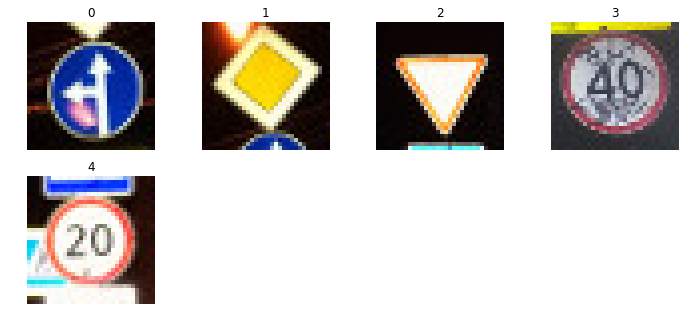

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#Import traffic signs class names
signs_class=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_class.append((row['SignName']))

#Import test images  
test_img_paths = [img_path for img_path in glob.glob("./new_images/*")]
test_img=np.uint8(np.zeros((5,32,32,3)))
for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_COLOR)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    test_img[i]=img

#Visualize new raw images
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(3, 4, i+1)
    plt.imshow(test_img[i]) 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from .\lenet


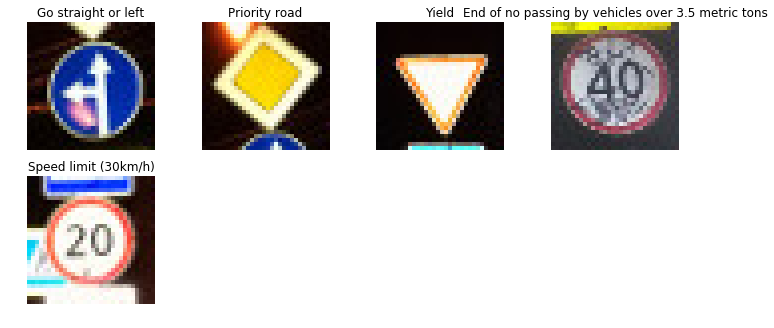

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

            
def test_net(X_data, sess):
    pred_sign = sess.run(tf.argmax(logits, 1), feed_dict={x: X_data, keep_prob: 1.0})
    return pred_sign

X_test_data=np.uint8(np.zeros((5,32,32,3)))
for i in range(5):
    img = test_img[i]
    #img=my_images_normalized[i]
    #X_test_data[i]=augment_img(img)
    X_test_data[i]=img

#X_test_data = X_test_data.reshape((-1, 32, 32, 3)).astype(np.float32)

X_test_data_gry = np.sum(X_test_data/3, axis=3, keepdims=True)
X_test_data_normalized = (X_test_data_gry - 128)/128
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    signs_classes=test_net(X_test_data_normalized, sess)


plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_test_data[i]) 
    plt.title(signs_class[signs_classes[i]])
    plt.axis('off')
plt.show()



### Analyze Performance

INFO:tensorflow:Restoring parameters from .\lenet


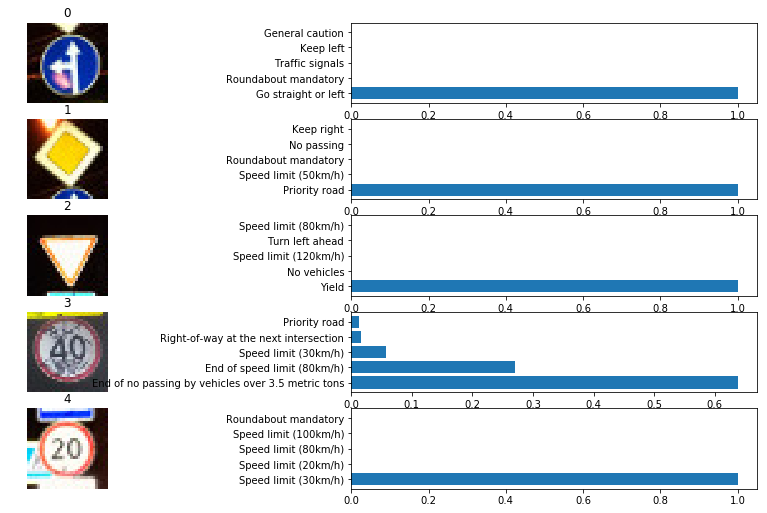

In [21]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


def test_net(X_data, sess): 
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data, keep_prob: 1.0})    
    top_5 = tf.nn.top_k(prob, k=5)
    return sess.run(top_5)


with tf.Session() as sess:
    saver.restore(sess,  tf.train.latest_checkpoint('.'))
    signs_top_5=test_net(X_test_data_normalized, sess)
    
    plt.figure(figsize=(16, 21))
for i in range(5):
    plt.subplot(12, 2, 2*i+1)
    plt.imshow(test_img[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(12, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), signs_top_5.values[i, :])
    labs=[signs_class[j] for j in signs_top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [23]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")